In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [13]:
unemployement_data = pd.read_csv("Unemployment in India - Unemployment in India.csv")

In [14]:
covid_data = pd.read_csv("Unemployment_Rate_upto_11_2020 - Unemployment_Rate_upto_11_2020.csv")

In [17]:
unemployement_data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [18]:
covid_data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [19]:
data = pd.merge(unemployement_data,covid_data,on="Date")

In [20]:
data.isnull().sum()

Region_x                                     0
Date                                         0
Frequency_x                                  0
Estimated Unemployment Rate (%)_x            0
Estimated Employed_x                         0
Estimated Labour Participation Rate (%)_x    0
Area                                         0
Region_y                                     0
Frequency_y                                  0
Estimated Unemployment Rate (%)_y            0
Estimated Employed_y                         0
Estimated Labour Participation Rate (%)_y    0
Region.1                                     0
Longitude                                    0
Latitude                                     0
dtype: int64

In [24]:
data.fillna(method='bfill',inplace=True)

C:\Users\Shree\AppData\Local\Temp\ipykernel_2008\1664202156.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill',inplace=True)


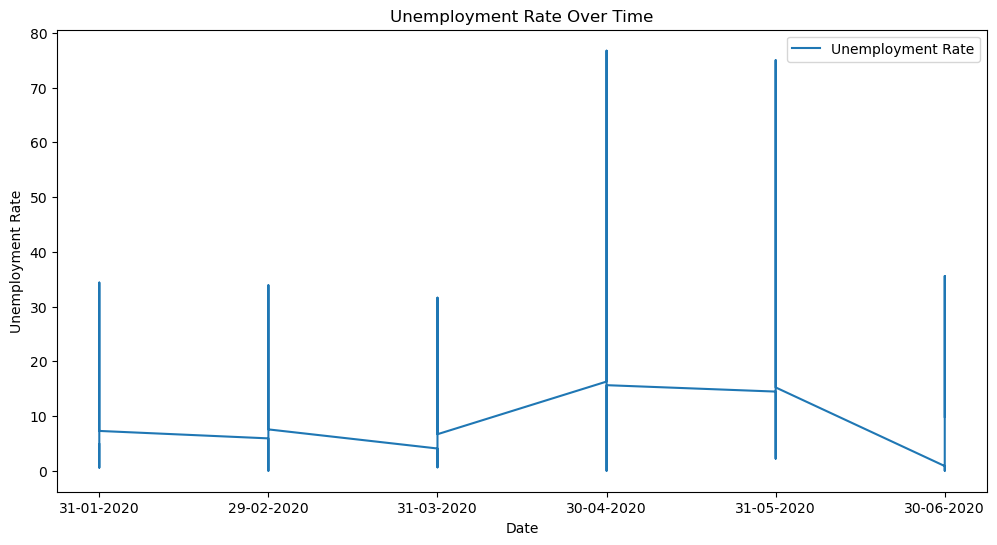

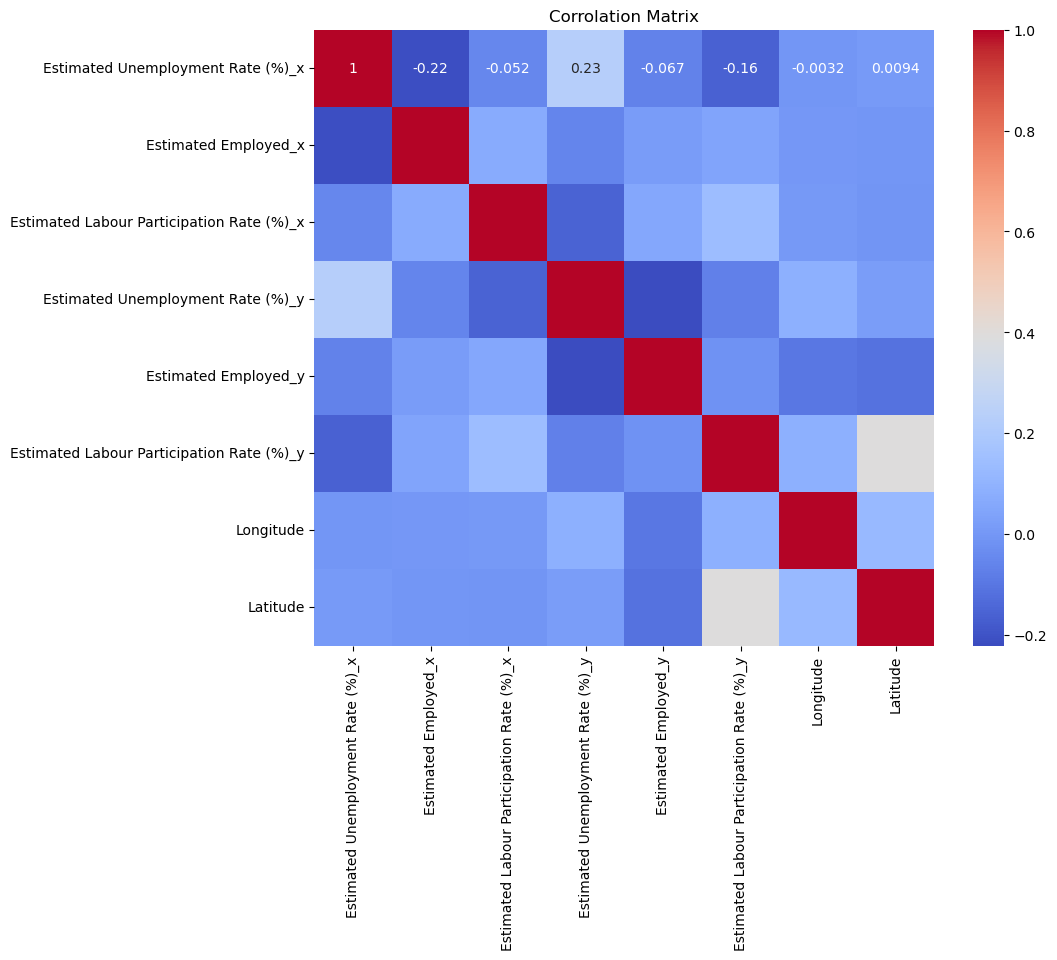

In [45]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Estimated Unemployment Rate (%)_x'],label='Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.show()
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.title('Corrolation Matrix')
plt.show()

In [41]:
data.columns


Index(['Region_x', 'Date', 'Frequency_x', 'Estimated Unemployment Rate (%)_x',
       'Estimated Employed_x', 'Estimated Labour Participation Rate (%)_x',
       'Area', 'Region_y', 'Frequency_y', 'Estimated Unemployment Rate (%)_y',
       'Estimated Employed_y', 'Estimated Labour Participation Rate (%)_y',
       'Region.1', 'Longitude', 'Latitude'],
      dtype='object')

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


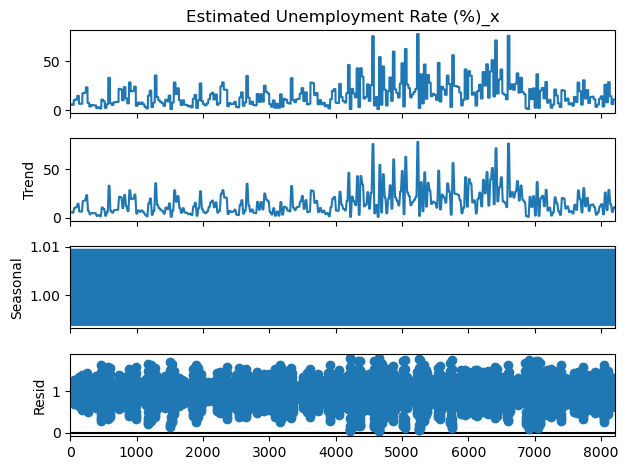

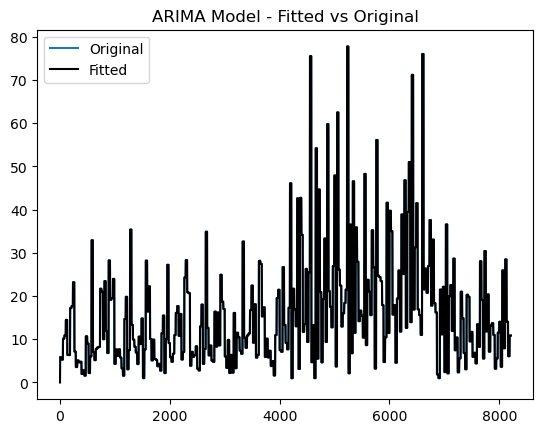

In [60]:
min_value = data['Estimated Unemployment Rate (%)_x'].min()
if min_value <= 0:
    data['Estimated Unemployment Rate (%)_x'] += abs(min_value) + 1
    
result = seasonal_decompose(data['Estimated Unemployment Rate (%)_x'], model='multiplicative', period=12)
result.plot()
plt.show()

# ARIMA model
model = ARIMA(data['Estimated Unemployment Rate (%)_x'], order=(5, 1, 0))
model_fit = model.fit()
plt.plot(data['Estimated Unemployment Rate (%)_x'], label='Original')
plt.plot(model_fit.fittedvalues, color='black', label='Fitted')
plt.title('ARIMA Model - Fitted vs Original')
plt.legend()
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
features = ['Estimated Employed_x', 'Estimated Labour Participation Rate (%)_x', 'Longitude', 'Latitude']
X = data[features]
y = data['Estimated Unemployment Rate (%)_x']

X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'R-squared:{r2}')

MAE: 9.827974110489306
R-squared:0.050466625561116474


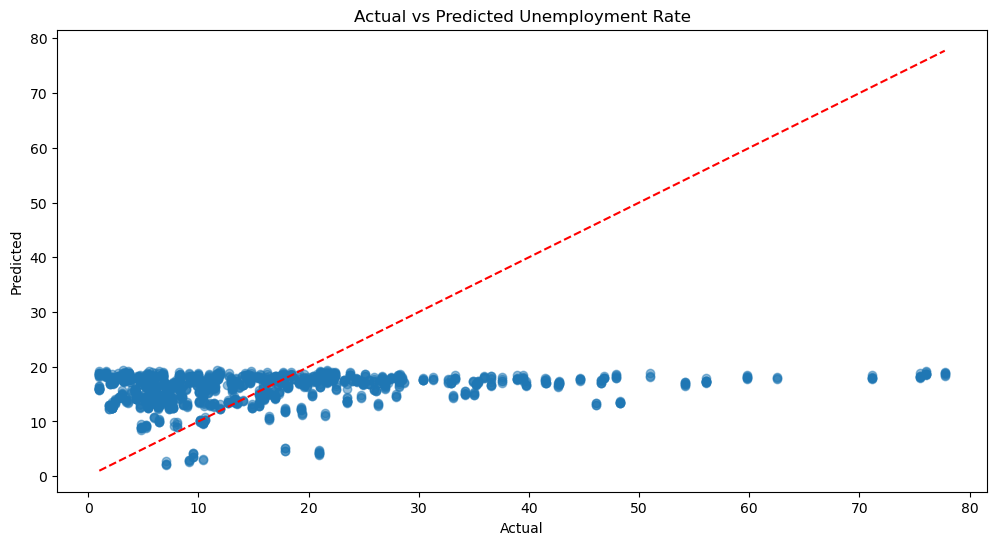

In [68]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Unemployment Rate')
plt.show()